# Dataset import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('creditcard.csv')

# 1. Dataset pre-processing

In [5]:
print(df.describe(percentiles=[.25, .5, .75]))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### 1.1 Overview
The dataset is made up of 284807 transactions, each with a Time, Amount, 28 generic features and a label called Class, regarding the type of transaction, fraudolent or not.  

Analyzing the 'Class' label it is confirmed that the dataset is highly imbalanced, with only the 0.173% of the transactions in the dataset classified as fraudolent.

In [6]:
print(f"Dataset length: {len(df)}\n\n")
print(f"Columns names:\n {df.columns}\n\n")

print(f"Number of fraudolent transactions in the dataset:     {df[df['Class']==1]['Class'].count()}")
print(f"Number of non-fraudolent transactions in the dataset: {df[df['Class']==0]['Class'].count()}")
print(f"Percentage of fraudolent transactions in the dataset: {round(df[df['Class']==1]['Class'].count()/df[df['Class']==0]['Class'].count()*100,3)}%")

Dataset length: 284807


Columns names:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Number of fraudolent transactions in the dataset:     492
Number of non-fraudolent transactions in the dataset: 284315
Percentage of fraudolent transactions in the dataset: 0.173%


### 1.2 Duplicated deletion
The number of fraudulent transactions is rechecked after removing duplicates, as it is already quite negligible to begin with.

In [12]:
df.drop_duplicates(inplace=True)
print(f"Number of fraudolent transactions in the dataset after removing duplicates:     {df[df['Class']==1]['Class'].count()}")

Number of fraudolent transactions in the dataset after removing duplicates:     473


### 1.3   'Time' and 'Amount' trends

From the plots below:
- 'Time' exhibits a consistent monotonically increasing trend across the dataset.
- 'Amount' does not seem to follow any particular trend along the dataset.

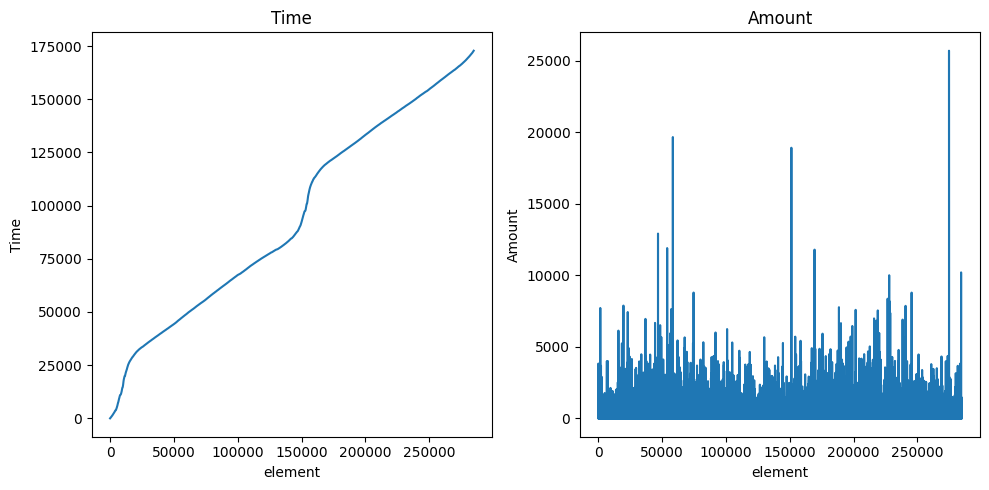

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Time'])
plt.xlabel('element')
plt.ylabel('Time')
plt.title('Time')

plt.subplot(1, 2, 2)
plt.plot(df['Amount'])
plt.xlabel('element')
plt.ylabel('Amount')
plt.title('Amount')

plt.tight_layout()
plt.show()

### 1.4   'Time' and 'Amount' distribution

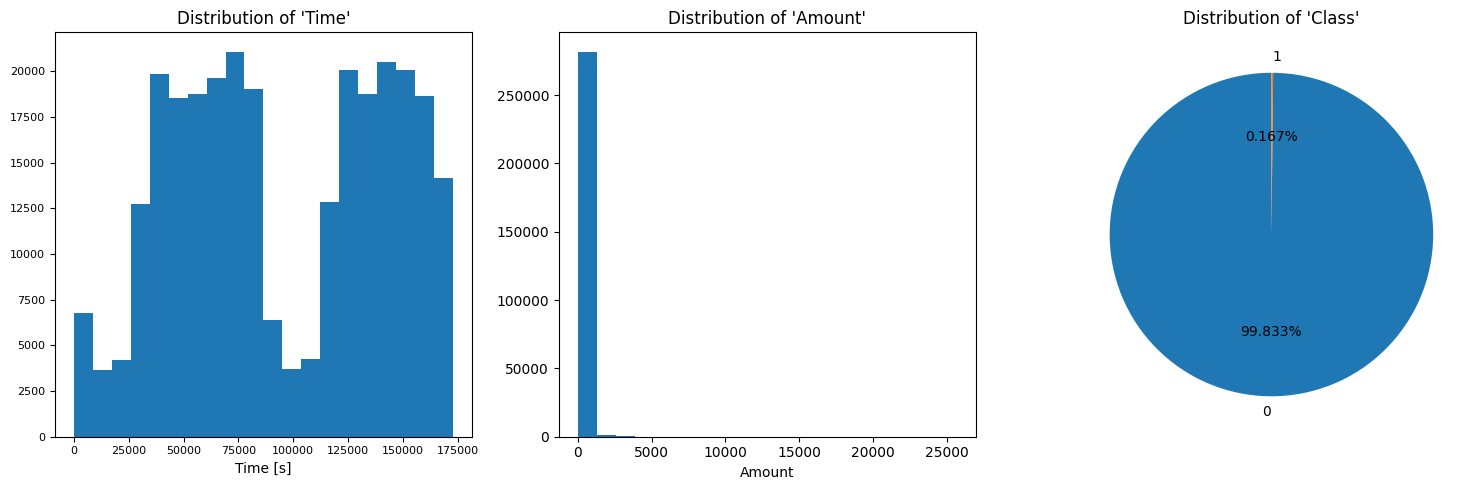

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Time'], bins=20)
plt.title('Distribution of \'Time\'')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Time [s]')

plt.subplot(1, 3, 2)
plt.hist(df['Amount'], bins=20)
plt.title('Distribution of \'Amount\'')
plt.xlabel('Amount')

plt.subplot(1, 3, 3)
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.3f%%', startangle=90)
plt.title('Distribution of \'Class\'')

plt.tight_layout()
plt.show()

Time distribution has two peaks.  
The time window seems to be 48 hours.  
Hence, the two peaks may correspond to the daily activity in two days (48 hours).
To verify this, I developed a function to transform 'Time' from seconds to the format 'hours:minutes'. This allows to have a better visual perception of the 'Time' distribution across the day in the plot.
The peaks of transactions are strictly correlated to the daytime activity, while the transactions during the night time are significantly reduced.

Time window in hours: 48


Text(0.5, 0, 'Time [s]')

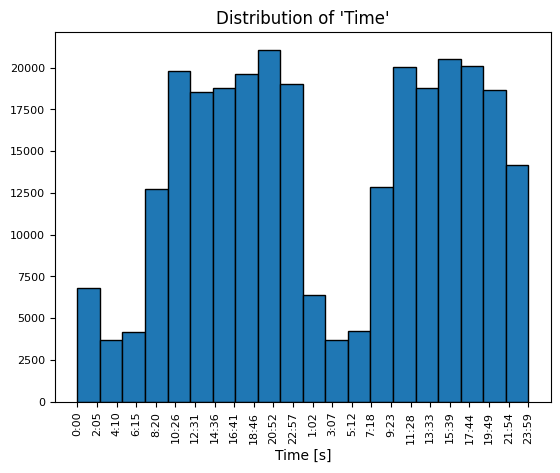

In [10]:
print(f"Time window in hours: {round(df['Time'].max()/3600)}")

def seconds_to_hours(seconds):
    ''' Transform seconds to a string in the format hours:minutes
    '''
    hours, remainder = divmod(seconds, 3600)
    minutes,_ = divmod(remainder, 60)
    hours = round(hours)
    minutes = round(minutes)
    if len(str(minutes))==1:
        minutes = '0'+str(minutes)
    else:
        str(minutes)

    if hours>24:
        hours-=24
    return str(hours) + ':' + str(minutes)

''' Plot 'Time' distribution translated from seconds to hh:mm '''
fig, ax = plt.subplots()
plt.hist(df['Time'], bins=20, edgecolor='black')
plt.title('Distribution of \'Time\'')

tick_positions = np.linspace(0, df['Time'].max(), 24)
tick_labels = []
for val in tick_positions:
    tick_labels.append(seconds_to_hours(val))

plt.xticks(tick_positions, tick_labels, rotation='vertical', fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Time [s]')

### 1.5 Feature correlation analysis

To identify any correlation among the features the correlation map of the dataset is plotted.  
A table with the highest 10 (absolute) correlations values is printed below.  

The following correlations stand out:
- **V2** and **Amount** with a value of **-0.531** (sign from the heatmap below)
- **V3** and **Time**   with a value of **-0.419** (sign from the heatmap below)
- **V7** and **Amount** with a value of **0.397**
- **V5** and **Amount** with a value of **-0.386** (sign from the heatmap below)

Except for **'Time'** and **'Amount'**, all the **V-** features are completely unrelated to each other, some Dimensionality Reduction technique, such as PCA, may have already been applied to them.

It is decided not to removed any features before building the classification model.

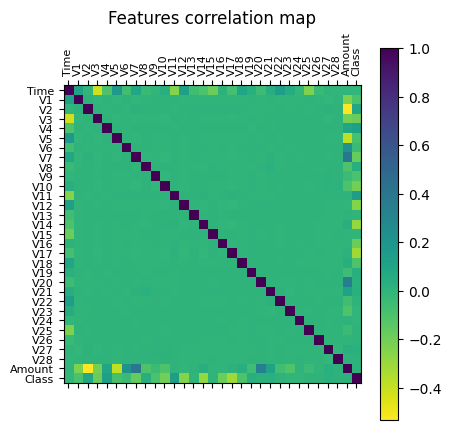

Top 10 Correlations:
Amount  V2        0.533428
V3      Time      0.422054
Amount  V7        0.400408
V5      Amount    0.387685
Amount  V20       0.340729
Class   V17       0.313498
        V14       0.293375
        V12       0.250711
Time    V11       0.248536
V25     Time      0.233262
dtype: float64


In [11]:
corr = df.corr()
plt.matshow(corr, cmap='viridis_r') # colormap is reversed so that bright colors indicate higher negative correlation
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns, fontsize=8)
plt.title('Features correlation map')
plt.show()

corr = corr.abs() # Compute absolute correlation values to have the highset absolute values ordered and only consider the highset ones
np.fill_diagonal(corr.values, np.nan) # Fill diagonal with NaN, as of course these values will be the highest and the least interesting
top_correlations = corr.unstack().sort_values(ascending=False).nlargest(20) # Flatten the correlation matrix and find the top 5 correlations
top_correlation_columns = [(pair[0], pair[1]) for pair in top_correlations.index] # Extract the corresponding column pairs

# Display the result
print("Top 10 Correlations:")
print(top_correlations[::2]) # Only print the odd lines, since the feature pairs consistently appear in mirrored versions (e.g. if A and B are highly correlated, also B and A are)

# 2. Classification model

**Random forest** is chosen as classification algorithm as it is a **simple** model that can handle **complex datasets** and is **less prone to overfitting** than other models.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 2.1 Splitting the dataset in training and validation set

The ***'stratify'*** parameter in **train_test_split()** is crucial for maintaining the proportions of both *data* and *labels* in the training and validation datasets, keepeing their distribution as in the original dataset. This becomes particularly significant with such an imbalanced dataset as this one.  

70% of the original dataset is used for training the model, while the remaingin 30% is used for testing it.

The features are standardized removing the mean and rescaling to unit variance with *StandardScaler( )*.

In [18]:
data = df.drop('Class', axis=1)
labels = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, test_size = 0.3, random_state = 10, shuffle=True)
StandardScaler().fit(X_train.values)
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
158385,111148.0,2.103885,0.050468,-1.432952,0.325548,0.375125,-0.725293,0.040783,-0.335604,2.113656,...,-0.285240,0.091110,0.641035,-0.004778,0.425669,0.353906,-0.474106,-0.025983,-0.056976,1.00
276709,167255.0,2.018766,0.150791,-1.599682,0.497901,0.083928,-1.331176,0.179708,-0.329349,0.922297,...,-0.140303,-0.245952,-0.407734,0.177270,-0.063665,-0.043556,-0.093381,-0.000688,-0.016457,10.20
132855,80144.0,1.113823,0.096278,0.407049,1.285891,-0.150741,0.132146,-0.074502,0.168787,0.131252,...,-0.213341,-0.055488,-0.000842,-0.070342,0.020758,0.609602,-0.328301,0.030965,0.005110,12.41
236214,148714.0,1.211586,-0.958029,-2.453992,1.577913,0.362166,-1.276887,1.583670,-0.749511,-0.436480,...,0.721684,0.453071,0.464533,-0.497037,-0.041005,0.459720,-0.461143,-0.115334,0.013646,459.00
130474,79361.0,-0.382207,1.082726,1.365217,-0.154536,0.220631,-0.581068,0.772428,-0.082249,-0.484690,...,0.174804,-0.248779,-0.621159,-0.081136,-0.112747,-0.098559,0.099281,0.268131,0.117938,8.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96408,65755.0,1.401899,-1.259219,0.754365,-1.272917,-1.918905,-0.791296,-1.209811,-0.134076,-1.550197,...,-0.238632,-0.034433,0.185501,-0.040898,0.377986,0.311477,-0.107623,0.040180,0.035321,62.40
15849,27292.0,-1.242069,1.357780,1.142481,2.943035,-0.381281,0.164104,0.311346,0.138942,-0.938993,...,-0.164226,-0.114726,-0.006412,0.324604,0.521447,-0.630640,-0.093659,-0.483905,-0.146492,45.46
230311,146279.0,-0.195326,0.507585,-0.236031,0.986930,0.124899,0.373920,2.039608,-0.654826,-0.656913,...,0.316350,0.014710,0.368276,-0.306716,-0.931656,0.056353,0.887230,-0.083212,-0.154145,258.90
32370,36767.0,0.830633,-1.156514,0.604912,0.720848,-1.327582,-0.048702,-0.538709,0.079896,-0.598776,...,-0.192979,-0.097311,-0.310665,-0.136232,0.015503,0.186765,-0.289169,0.034640,0.070291,232.00


In [15]:
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, y)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
